In [1]:
# System
import pathlib
import glob
import os, os.path, shutil
# Data Exploration
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
# Show the image path
data_CORROSION_dir = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Augmented_Dataset/Corrosion"
data_NOCORROSION_dir = "D:/Work/Corrosion_Detection/Preprocessed_Dataset/Augmented_Dataset/Nocorrosion"
new_dir = "D:/Work/Corrosion_Detection/Data_Split"

In [3]:
# Create objects that stores all the relevant images
images_CORROSION = [file for file in os.listdir(data_CORROSION_dir) if file.endswith('.jpg')]
images_NOCORROSION = [file for file in os.listdir(data_NOCORROSION_dir) if file.endswith('.jpg')]

In [4]:
# See how many images there in NORMAL directory and PNEUMONIA directory
print('There are', len(images_CORROSION), 'CORROSION images')
print('There are', len(images_NOCORROSION), 'NOCORROSION images')

There are 2508 CORROSION images
There are 1503 NOCORROSION images


Text(0, 0.5, 'Numer of Images')

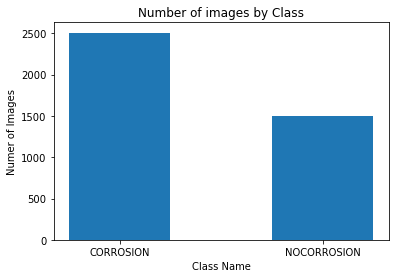

In [5]:
#Plot number of classes to identify imbalances
number_classes = {'CORROSION':2508,
                  'NOCORROSION':1503}
plt.bar(number_classes.keys(), number_classes.values(), width = 0.5)
plt.title("Number of images by Class")
plt.xlabel("Class Name")
plt.ylabel("Numer of Images")

Text(0.5, 1.0, 'Corrosion vs NoCorrosion')

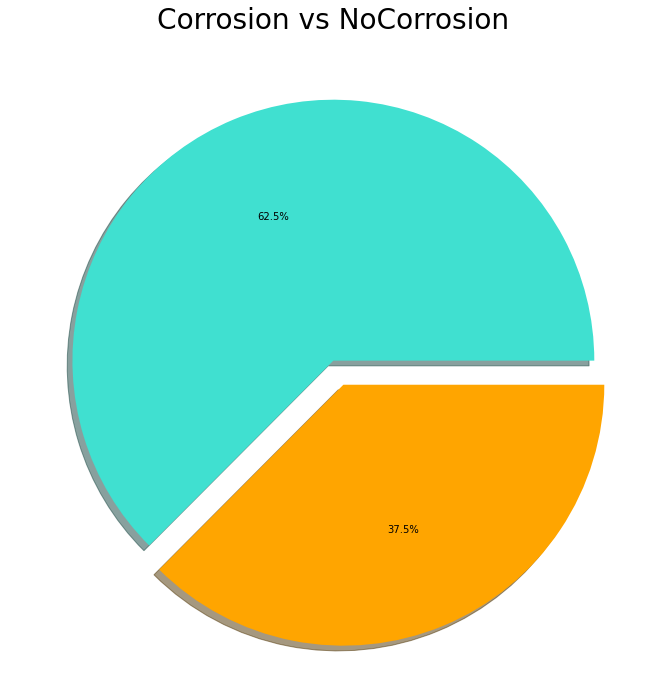

In [6]:
from  matplotlib import cm
figure =plt.figure(figsize=(12,12))
explode = [0, 0.1]
plt.pie(number_classes.values(),explode = explode,autopct = '%3.1f%%',shadow = True, colors = ('turquoise','orange'))
plt.title('Corrosion vs NoCorrosion',fontsize = 28)

In [7]:
# Create the new folder 'Data_Split'
os.mkdir(new_dir)

In [8]:
# Create a subfolder 'Train' under the 'Data_Split'
train_folder = os.path.join(new_dir, 'Train')
# Create subfolders 'train_CORROSION' and 'train_NOCORROSION' under the 'Train'
train_CORROSION = os.path.join(train_folder, 'CORROSION')
train_NOCORROSION = os.path.join(train_folder, 'NOCORROSION')
#___________________________________________________________________________
# Create a subfolder 'Test' under the 'Data_Split'
test_folder = os.path.join(new_dir, 'Test')
# Create subfolders 'test_CORROSION' and 'test_NOCORROSION' under the 'Test'
test_CORROSION = os.path.join(test_folder, 'CORROSION')
test_NOCORROSION = os.path.join(test_folder, 'NOCORROSION')
#___________________________________________________________________________
# Create a subfolder 'Validation' under the 'Data_Split'
val_folder = os.path.join(new_dir, 'Validation')
# # Create subfolders 'val_CORROSION' and 'val_NOCORROSION' under the 'Test'
val_CORROSION = os.path.join(val_folder, 'CORROSION')
val_NOCORROSION = os.path.join(val_folder, 'NOCORROSION')

In [9]:
#Use all the path strings to make new directories
os.mkdir(train_folder)
os.mkdir(train_CORROSION)
os.mkdir(train_NOCORROSION)

os.mkdir(test_folder)
os.mkdir(test_CORROSION)
os.mkdir(test_NOCORROSION)

os.mkdir(val_folder)
os.mkdir(val_CORROSION)
os.mkdir(val_NOCORROSION)

In [10]:
# Use a 70%/20%/10% split for train/validation/test
print('Number of images to train')
print('# train_CORROSION: ', round(len(images_CORROSION)*0.7))
print('# train_NOCORROSION: ', round(len(images_NOCORROSION)*0.7))
print('________________________________________________')
print('Number of images to validation')
print('# val_CORROSION: ', round(len(images_CORROSION)*0.2))
print('# val_NOCORROSION: ', round(len(images_NOCORROSION)*0.2))
print('________________________________________________')
print('Number of images to test')
print('# test_CORROSION: ', round(len(images_CORROSION)*0.1))
print('# test_NOCORROSION: ', round(len(images_NOCORROSION)*0.1))

Number of images to train
# train_CORROSION:  1756
# train_NOCORROSION:  1052
________________________________________________
Number of images to validation
# val_CORROSION:  502
# val_NOCORROSION:  301
________________________________________________
Number of images to test
# test_CORROSION:  251
# test_NOCORROSION:  150


In [11]:
#train CORROSION
imgs = images_CORROSION[:1756]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(train_CORROSION, img)
    shutil.copyfile(origin, destination)
# validation CORROSION
imgs = images_CORROSION[1756:2258]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(val_CORROSION, img)
    shutil.copyfile(origin, destination)
# test CORROSION
imgs = images_CORROSION[2258:]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(test_CORROSION, img)
    shutil.copyfile(origin, destination)

In [12]:
# train NOCORROSION
imgs = images_NOCORROSION
for img in imgs[:1052]:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(train_NOCORROSION, img)
    shutil.copyfile(origin, destination)
# validation NOCORROSION
imgs = images_NOCORROSION[1052:1353]
for img in imgs:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(val_NOCORROSION, img)
    shutil.copyfile(origin, destination)
# test NOCORROSION
imgs = images_NOCORROSION[1353:]
for img in imgs:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(test_NOCORROSION, img)
    shutil.copyfile(origin, destination)

In [13]:
train_dir = "D:/Work/Corrosion_Detection/Data_Split/Train"
train_CORROSION_dir = "D:/Work/Corrosion_Detection/Data_Split/Train/CORROSION"
train_NOCORROSION_dir = "D:/Work/Corrosion_Detection/Data_Split/Train/NOCORROSION"

validation_dir = "D:/Work/Corrosion_Detection/Data_Split/Validation"
validation_CORROSION_dir = "D:/Work/Corrosion_Detection/Data_Split/Validation/CORROSION"
validation_NOCORROSION_dir = "D:/Work/Corrosion_Detection/Data_Split/Validation/NOCORROSION"

test_dir = "D:/Work/Corrosion_Detection/Data_Split/Test"
test_CORROSION_dir = "D:/Work/Corrosion_Detection/Data_Split/Test/CORROSION"
test_NOCORROSION_dir = "D:/Work/Corrosion_Detection/Data_Split/Test/NOCORROSION"

In [14]:
def num_files_in_direcotry(path):
    num = len([file for file in os.listdir(path) if file.endswith('.jpg')])
    return num

In [15]:
train_CORROSION_num = num_files_in_direcotry(train_CORROSION_dir)
train_NOCORROSION_num = num_files_in_direcotry(train_NOCORROSION_dir)
train_SUM_num = train_CORROSION_num + train_NOCORROSION_num

print("[Train] Number of CORROSION Images: ", train_CORROSION_num)
print("[Train] Number of NOCORROSION Images: ", train_NOCORROSION_num)
print("[Train] Number of TOTAL Images: ", train_SUM_num)

[Train] Number of CORROSION Images:  1756
[Train] Number of NOCORROSION Images:  1052
[Train] Number of TOTAL Images:  2808


In [16]:
val_CORROSION_num = num_files_in_direcotry(validation_CORROSION_dir)
val_NOCORROSION_num = num_files_in_direcotry(validation_NOCORROSION_dir)
val_SUM_num = val_CORROSION_num + val_NOCORROSION_num

print("[Validation] Number of CORROSION Images: ", val_CORROSION_num)
print("[Validation] Number of NOCORROSION Images: ", val_NOCORROSION_num)
print("[Validation] Number of TOTAL Images: ", val_SUM_num)

[Validation] Number of CORROSION Images:  502
[Validation] Number of NOCORROSION Images:  301
[Validation] Number of TOTAL Images:  803


In [17]:
test_CORROSION_num = num_files_in_direcotry(test_CORROSION_dir)
test_NOCORROSION_num = num_files_in_direcotry(test_NOCORROSION_dir)
test_SUM_num = test_CORROSION_num + test_NOCORROSION_num

print("[test] Number of CORROSION Images: ", test_CORROSION_num)
print("[test] Number of NOCORROSION Images: ", test_NOCORROSION_num)
print("[test] Number of TOTAL Images: ", test_SUM_num)

[test] Number of CORROSION Images:  250
[test] Number of NOCORROSION Images:  150
[test] Number of TOTAL Images:  400


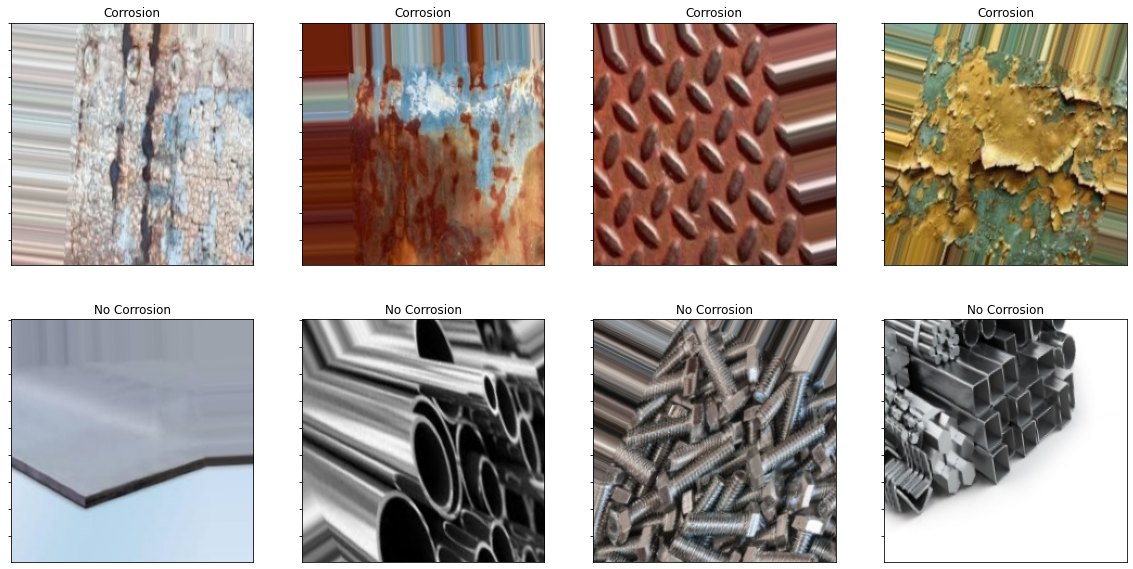

In [20]:
# Plot CORROSION and NOCORROSION in new training dataset
plt.figure(figsize = (20,10))
num_imgs_1 = 4
for index in range(num_imgs_1):
    train_corrosion_pic_name = os.listdir(train_CORROSION_dir)[index]
    train_corrosion_pic_address = train_CORROSION_dir + "/" + train_corrosion_pic_name
#    fig, ax_list = plt.sunplots(nrows = 2, ncols =4)
    plt.subplot(2, num_imgs_1, index + 1)
    plt.imshow(Image.open(train_corrosion_pic_address))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Corrosion')

    train_nocorrosion_pic_name = os.listdir(train_NOCORROSION_dir)[index]
    train_nocorrosion_pic_address = train_NOCORROSION_dir + "/" + train_nocorrosion_pic_name

    plt.subplot(2, num_imgs_1, index + num_imgs_1 + 1)
    plt.imshow(Image.open(train_nocorrosion_pic_address))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('No Corrosion')

In [22]:
# Check New traning dataset images sizes
num_imgs_2 = 15
for index in range(num_imgs_2):
    train_corrosion_pic_name = os.listdir(train_CORROSION_dir)[index]
    train_corrosion_pic_address = train_CORROSION_dir + "/" + train_corrosion_pic_name
    train_corrosion_image = Image.open(train_corrosion_pic_address)
    train_corrosion_width, train_corrosion_height = train_corrosion_image.size
    print('train_CORROSION_image', index + 1, ":" , train_corrosion_width, 'x', train_corrosion_height)

    train_nocorrosion_pic_name = os.listdir(train_NOCORROSION_dir)[index]
    train_nocorrosion_pic_address = train_NOCORROSION_dir + "/" + train_nocorrosion_pic_name
    train_nocorrosion_image = Image.open(train_nocorrosion_pic_address)
    train_nocorrosion_width, train_nocorrosion_height = train_nocorrosion_image.size
    print('train_NOCORROSION_image', index + 1, ":" , train_nocorrosion_width, 'x', train_nocorrosion_height)
    print('\n')

train_CORROSION_image 1 : 224 x 224
train_NOCORROSION_image 1 : 224 x 224


train_CORROSION_image 2 : 224 x 224
train_NOCORROSION_image 2 : 224 x 224


train_CORROSION_image 3 : 224 x 224
train_NOCORROSION_image 3 : 224 x 224


train_CORROSION_image 4 : 224 x 224
train_NOCORROSION_image 4 : 224 x 224


train_CORROSION_image 5 : 224 x 224
train_NOCORROSION_image 5 : 224 x 224


train_CORROSION_image 6 : 224 x 224
train_NOCORROSION_image 6 : 224 x 224


train_CORROSION_image 7 : 224 x 224
train_NOCORROSION_image 7 : 224 x 224


train_CORROSION_image 8 : 224 x 224
train_NOCORROSION_image 8 : 224 x 224


train_CORROSION_image 9 : 224 x 224
train_NOCORROSION_image 9 : 224 x 224


train_CORROSION_image 10 : 224 x 224
train_NOCORROSION_image 10 : 224 x 224


train_CORROSION_image 11 : 224 x 224
train_NOCORROSION_image 11 : 224 x 224


train_CORROSION_image 12 : 224 x 224
train_NOCORROSION_image 12 : 224 x 224


train_CORROSION_image 13 : 224 x 224
train_NOCORROSION_image 13 : 224 x 224


trai